# **Credit Card Fraud Detection with Python & Machine Learning**

### ***By Dhruv Boricha***

For any bank or financial institution, fraud detection using credit cards is a priority. We must detect possible fraud so that consumers will not be able to charge items that they have not purchased. The goal is therefore to create a classifier that informs us if a requested transaction is a fraud.

In this machine learning project, we solve the problem of detecting credit card fraud transactions using machine numpy, scikit learn, and few other python libraries. We overcome the problem by creating a binary classifier and experimenting with various machine learning techniques to see which fits better.

### ***Dataset Description***

The dataset consists of 31 parameters. Due to confidentiality issues, 28 of the features are the result of the PCA transformation. “Time’ and “Amount” are the only aspects that were not modified with PCA.

There are a total of 284,807 transactions with only 492 of them being fraud. So, the label distribution suffers from imbalance issues.

The dataset used in this project is the dataset 'Credit Card Fraud Detection', available on Kaggle.

### ***Steps to Develop Credit Card Fraud Classifier***

The approach to building the classifier is as follows:

- Perform Exploratory Data Analysis (EDA) on our dataset.
- Apply different Machine Learning algorithms to our dataset.
- Train and Evaluate our models on the dataset and pick the best one.

In this machine learning project, we build Random Forest and Decision Tree classifiers and see which one works best. We address the “class imbalance” problem by picking the best-performed model.

## **1. Importing Libraries**

In [1]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt

In [2]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

## **2. Data Loading**

In [3]:
# Loading the csv file

dataframe = pd.read_csv(r"C:\Users\Dhruv Boricha\Downloads\creditcarddataset\creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **3. Exploratory Data Analysis (EDA)**

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking for null values

dataframe.isnull().values.any()

False

In [6]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


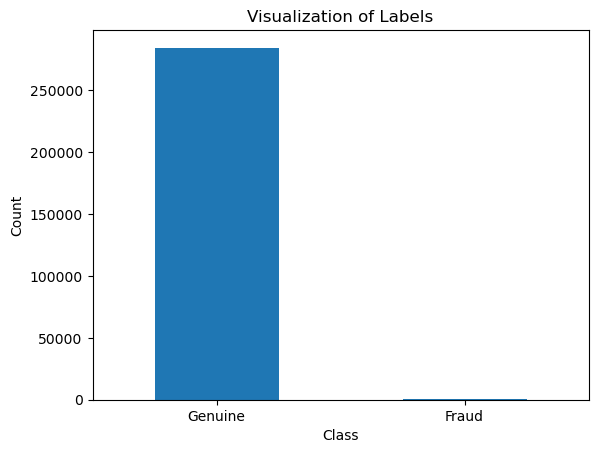

In [8]:
# Visualizing the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

We can observe that the genuine transactions are over 99%! Which is not good.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [9]:
# Perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Now, let’s split credit card data with a split of 70-30 using train_test_split().

In [11]:
# Spliting the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


Let's train different models on our dataset and observe which algorithm works better for our problem.

Let's apply Random Forests and Decision Trees algorithms to our dataset.

## **4. Model Building**

Now, Let’s train and evaluate the newly created models on the dataset and pick the best one.

Training the decision tree and random forest models on the dataset using the fit() function. Recording the predictions made by the models using the predict() function and evaluate.

Let’s visualize the scores of each of our credit card fraud classifiers.

### ***Decision Tree Classifier***

The Decision Tree algorithm is a supervised machine learning algorithm used for classification and regression tasks. The algorithm’s aim is to build a training model that predicts the value of a target class variable by learning simple if-then-else decision rules inferred from the training data.

In [12]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [13]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.91105181231933


In [14]:
#funtion to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Let’s visualize the confusion matrix and the evaluation metrics of our Decision Tree model.

In [15]:
# Plotting confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85261    46]
 [   30   106]]


Confusion matrix, without normalization


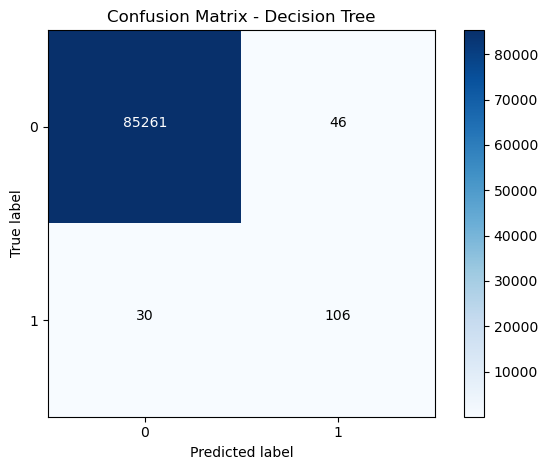

In [16]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [17]:
#functions for printing the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

In [18]:
#Metrics for Decision Tree Model
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99911
Precision: 0.69737
Recall: 0.77941
F1-score: 0.73611


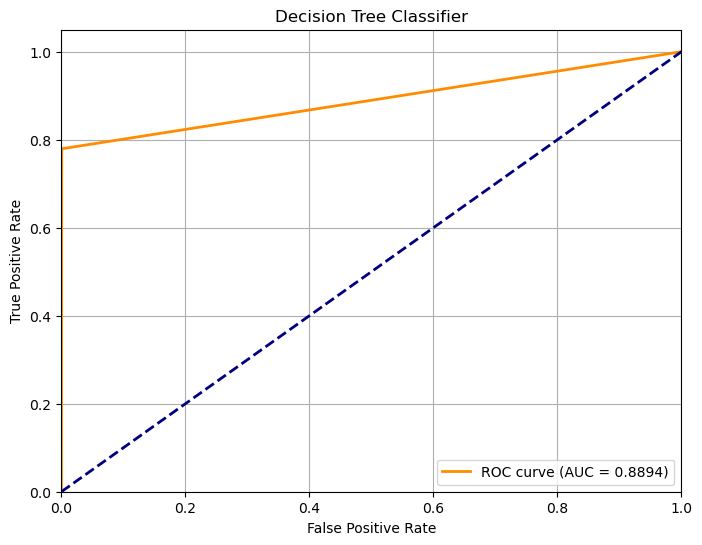

AUC Score (Decision Tree): 0.8894


In [19]:
# Getting predicted probabilities for the positive class (label 1)
y_prob_dt = decision_tree.predict_proba(test_X)[:, 1]

# Computing ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(test_Y, y_prob_dt)
roc_auc_dt = roc_auc_score(test_Y, y_prob_dt)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Printig AUC Score
print("AUC Score (Decision Tree): {:.4f}".format(roc_auc_dt))

### ***Random Forest***

Random forest is a supervised machine learning algorithm. It creates a “forest” out of an ensemble of “decision trees”, which are normally trained using the “bagging” technique. The bagging method’s basic principle is that combining different learning models improves the outcome.

In [20]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [21]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.9602073897218


Let’s visualize the confusion matrix and the evaluation metrics of our Random Forest model.

In [22]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85299     8]
 [   26   110]]


Confusion matrix, without normalization


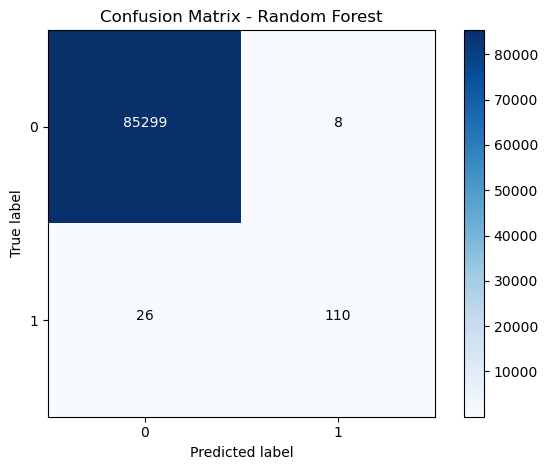

In [23]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [24]:
#Metrics for Random Forest Model
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99960
Precision: 0.93220
Recall: 0.80882
F1-score: 0.86614


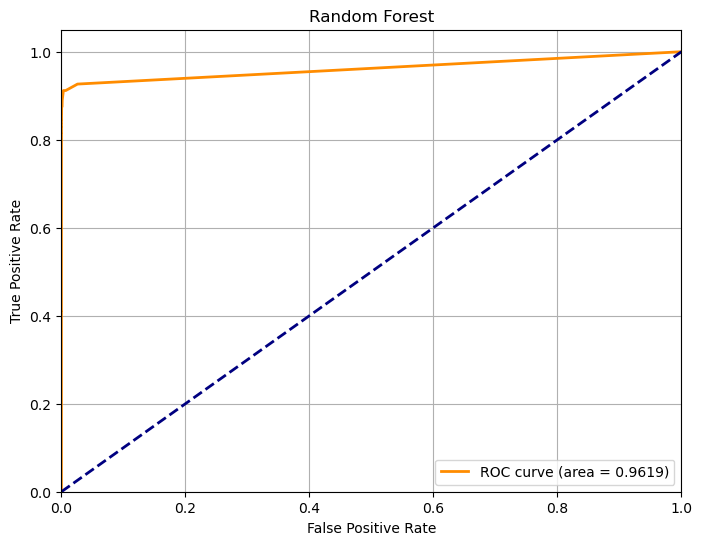

AUC Score: 0.9619


In [25]:
# Getting predicted probabilities for the positive class
y_prob_rf = random_forest.predict_proba(test_X)[:, 1]

# Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_Y, y_prob_rf)
roc_auc = roc_auc_score(test_Y, y_prob_rf)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Printing AUC Score
print("AUC Score: {:.4f}".format(roc_auc))

Clearly, Random Forest model works better than Decision Trees

But, if we clearly observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the fraud transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. Over sampling is one of them.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.

Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [26]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


As the Random Forest algorithm performed better than the Decision Tree algorithm, we will apply the Random Forest algorithm to our resampled data.

In [27]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [28]:
# Predict on the test set
y_predict = random_forest.predict(test_X)

# Visualize the confusion matrix
cm_resampled = confusion_matrix(test_Y, y_predict.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[85143     6]
 [15259 70181]]


Confusion matrix, without normalization


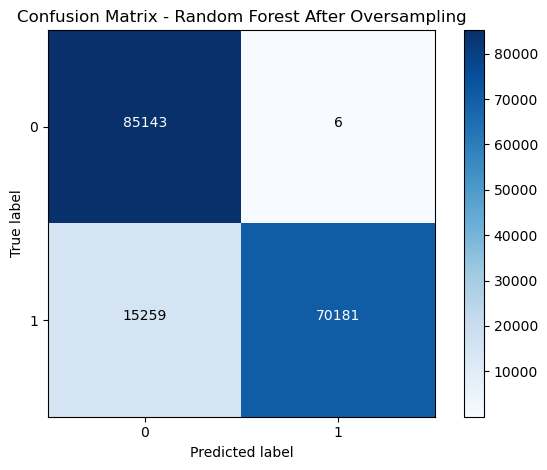

In [29]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [30]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99989
Precision: 0.99978
Recall: 1.00000
F1-score: 0.99989


Now it is evident that after addressing the class imbalance problem, our Random forest classifier with SMOTE performs far better than the Random forest classifier withour SMOTE.

### ***Summary***

In this python machine learning project, we built a binary classifier using the Random Forest algorithm to detect credit card fraud transactions. Through this project, we understood and applied techniques to address the class imbalance issues and achieved an accuracy of more than 99%.